User Database – This dataset contains information of users from a companies database. It contains information about UserID, Gender, Age, EstimatedSalary, Purchased. We are using this dataset for predicting that a user will purchase the company’s newly launched product or not.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('User_Data.csv') 
print(dataset.shape)

(400, 5)


In [3]:
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [4]:
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
# input  - Feature Matrix
x = dataset.iloc[:, [2, 3]].values 

# output - Feature Vector 
y = dataset.iloc[:, 4].values 


In [6]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

In [7]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

print (xtrain[0:10, :]) 

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_pred = classifier.predict(xtest) 

In [10]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [11]:
#print(type(ytest))
#print(type(y_pred))
#print(type(y_pred[0]))
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 


Accuracy :  0.89


#  SVM

In [35]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(xtrain, ytrain)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(xtest, ytest)))

Accuracy of SVM classifier on training set: 0.91
Accuracy of SVM classifier on test set: 0.93


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(xtrain, ytrain)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(xtrain, ytrain)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(xtest, ytest)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.90


# K-Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.93


([<matplotlib.axis.XTick at 0x17cb3f60>,
 <a list of 5 Text xticklabel objects>)

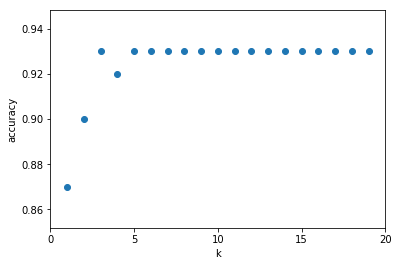

In [42]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    scores.append(knn.score(xtest, ytest))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

# Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(xtrain, ytrain)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(xtest, ytest)))

Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.90


# Gaussian Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(xtrain, ytrain)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(xtest, ytest)))

Accuracy of GNB classifier on training set: 0.88
Accuracy of GNB classifier on test set: 0.90
